## **1.Libraries**

In [266]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from eli5.sklearn import PermutationImportance
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
import eli5
from sklearn.model_selection import GridSearchCV , cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.feature_selection import SelectFromModel


## **2. Import Dataset**

In [267]:
df_train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
X_test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
pd.set_option('display.max_columns', None)

In [268]:
df_train_row = df_train.shape[0]


In [269]:

X_test_row = X_test.shape[0]


## **3.Analysis**

In [270]:
df_train.isnull().sum().sort_values(ascending=False).head(40)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
dtype: int64

In [271]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [272]:
X_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## **4.Preprocessing**

In [273]:
lotFrontagemedian = df_train.LotFrontage.median()
df_train.LotFrontage.fillna(lotFrontagemedian, inplace=True)

In [274]:
lotFrontagemedian = X_test.LotFrontage.median()
X_test.LotFrontage.fillna(lotFrontagemedian, inplace=True)
print(X_test.LotFrontage.isnull().sum())

0


In [275]:
garage = ['GarageCond','GarageType','GarageFinish','GarageQual', "Alley"]
categoric_imput = SimpleImputer(strategy='constant', fill_value="NA")
df_train[garage] = pd.DataFrame(categoric_imput.fit_transform(df_train[garage]),columns=garage)
df_train["GarageYrBlt"].fillna(0, inplace=True)
X_test[garage] = pd.DataFrame(categoric_imput.fit_transform(X_test[garage]),columns=garage)
X_test["GarageYrBlt"].fillna(0, inplace=True)

In [276]:
garage = ['GarageCond','GarageType','GarageFinish','GarageQual', "Alley"]
categoric_imput = SimpleImputer(strategy='constant', fill_value="NA")
df_train[garage] = pd.DataFrame(categoric_imput.fit_transform(df_train[garage]),columns=garage)
df_train["GarageYrBlt"].fillna(0, inplace=True)
X_test[garage] = pd.DataFrame(categoric_imput.fit_transform(X_test[garage]),columns=garage)
X_test["GarageYrBlt"].fillna(0, inplace=True)
df_train.GarageCars.fillna(0, inplace=True)
df_train.GarageArea.fillna(0, inplace=True)
X_test.GarageCars.fillna(0, inplace=True)
X_test.GarageArea.fillna(0, inplace=True)

In [277]:
basement = ["BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1"]
categoric_imput = SimpleImputer(strategy='constant', fill_value="NA")
df_train[basement] = pd.DataFrame(categoric_imput.fit_transform(df_train[basement]),columns=basement)
X_test[basement] = pd.DataFrame(categoric_imput.fit_transform(X_test[basement]),columns=basement)

In [278]:
df_train.PoolQC.fillna("NA", inplace=True)
X_test.PoolQC.fillna("NA", inplace=True)

In [279]:
df_train.MiscFeature.fillna("NA", inplace=True)
X_test.MiscFeature.fillna("NA", inplace=True)

In [280]:
df_train.Fence.fillna("NA", inplace=True)
X_test.Fence.fillna("NA", inplace=True)

In [281]:
df_train.FireplaceQu.fillna("NA", inplace=True)
X_test.FireplaceQu.fillna("NA", inplace=True)

In [282]:
y_train = df_train.SalePrice
X_train = df_train.drop(["SalePrice"], axis=1)

In [283]:
X_train.isnull().sum().sort_values(ascending=False).head(30)

MasVnrType      8
MasVnrArea      8
Electrical      1
GarageYrBlt     0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageType      0
Id              0
CentralAir      0
GarageCars      0
SaleType        0
YrSold          0
MoSold          0
MiscVal         0
MiscFeature     0
Fence           0
PoolQC          0
dtype: int64

In [284]:
X_test.isnull().sum().sort_values(ascending=False).head(30)

MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
Utilities        2
BsmtFinSF2       1
Exterior1st      1
KitchenQual      1
BsmtFinSF1       1
Exterior2nd      1
BsmtUnfSF        1
TotalBsmtSF      1
SaleType         1
KitchenAbvGr     0
BedroomAbvGr     0
TotRmsAbvGrd     0
HalfBath         0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
FullBath         0
Id               0
GarageFinish     0
LowQualFinSF     0
ScreenPorch      0
YrSold           0
MoSold           0
dtype: int64

In [285]:

categoric_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns


categoric_imput = SimpleImputer(strategy='most_frequent')
X_train[categoric_columns] = pd.DataFrame(categoric_imput.fit_transform(X_train[categoric_columns]),columns=categoric_columns)
X_test[categoric_columns] = pd.DataFrame(categoric_imput.fit_transform(X_test[categoric_columns]),columns=categoric_columns)
numeric_imput = SimpleImputer(strategy='median')
X_train[numeric_columns] = pd.DataFrame(numeric_imput.fit_transform(X_train[numeric_columns]),columns=numeric_columns)
X_test[numeric_columns] = pd.DataFrame(numeric_imput.fit_transform(X_test[numeric_columns]),columns=numeric_columns)

In [286]:
X_test.isnull().sum().sort_values(ascending=False).head(30)

Id              0
MSSubClass      0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
PoolArea        0
SaleType        0
YrSold          0
MoSold          0
MiscVal         0
MiscFeature     0
Fence           0
PoolQC          0
dtype: int64

## **5.Attributes**

In [287]:
df = pd.concat([X_train, X_test], axis=0)

In [288]:
street = {"Grvl":1, 
          "Pave":2}
df["Street"] = df["Street"].map(street)

alley = {"NA": 0,
         "Grvl": 1,
         "Pave": 2}
df["Alley"] = df["Alley"].map(alley)


lotShape = {"IR3": 0,
            "IR2": 1,
            "IR1": 2,
            "Reg": 3}
df["LotShape"] = df["LotShape"].map(lotShape)

qualify = {"NA":0,
         "Po":1,
         "Fa":2,
         "TA":3,
         "Gd":4,
         "Ex":5}
cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]
for col in cols:
    df[col] = df[col].map(qualify)

bsmtExposure = {"NA": 0,
                "Gd":1,
                "Av":2,
                "Mn":3,
                "No":4}
df["BsmtExposure"] = df["BsmtExposure"].map(bsmtExposure)

bsmtFin = {"NA":0,
           "Unf":1,
           "LwQ":2,
           "Rec":3,
           "BLQ":4,
           "ALQ":5,
           "GLQ":6}
cols = ["BsmtFinType1", "BsmtFinType2"]
for col in cols:
    df[col] = df[col].map(bsmtFin)

garagefinish = {"NA":0,
                "Unf":1,
                "RFn":2,
                "Fin":3}
df["GarageFinish"] = df["GarageFinish"].map(garagefinish)

pavedDrive = {"N":0,
              "P":1,
              "Y":2}

In [289]:
bath = ["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"]
df["Bath"] = df.loc[:,bath].sum(axis=1)

df.drop(bath, inplace=True, axis=1)

In [290]:
categoric_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [291]:
df.reset_index(drop=True,inplace=True)

In [292]:
enc = OneHotEncoder(handle_unknown='ignore',sparse = False)
categoric = pd.DataFrame(enc.fit_transform(df[categoric_columns]),columns= enc.get_feature_names_out())
df = pd.concat([df[numeric_columns], categoric], axis=1)

In [293]:
corrAlta = []
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            correl = df[col1].corr(df[col2])
            if correl > 0.9:
                corrAlta.append(col2)


<AxesSubplot:>

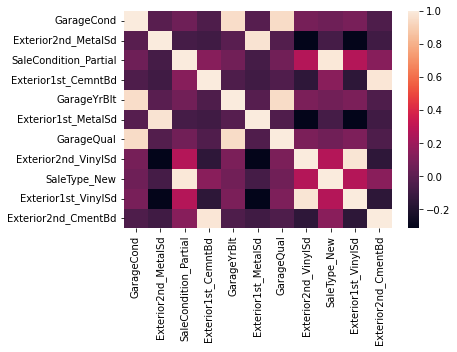

In [294]:
corrAlta = list(set(corrAlta))
sns.heatmap(df[corrAlta].corr())

In [295]:
df.drop(["GarageQual", "GarageCond", "SaleType_New", "Exterior2nd_MetalSd", "Exterior2nd_VinylSd", "Exterior2nd_CmentBd"],  axis=1, inplace=True)

In [296]:
X_train = pd.concat([df[:df_train_row], y_train], axis=1)

X_test = df[df_train_row:]

registros = np.array([True] * len(X_train))


cols = ["LotArea", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea"]


for col in cols:
    
   
    zscore = abs(stats.zscore(X_train[col]))
    
   
    registros = (zscore < 3) & registros


X_train = X_train[registros]




In [297]:
y_train = X_train["SalePrice"]

X_train.drop("SalePrice", inplace=True, axis=1)

df_train_row = len(X_train)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

df = pd.concat([X_train, X_test], axis=0)


In [298]:
X_train = df.iloc[:df_train_row].reset_index(drop=True)
X_test = df.iloc[df_train_row:].reset_index(drop=True)

In [299]:
categoric_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = RobustScaler()
scaler.fit(X_train[numeric_columns])
X_train[numeric_columns] = scaler.transform(X_train[numeric_columns])
scaler.fit(X_test[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

## **6.Model Training**

In [300]:

"""X_train_ = X_train[['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Bath', 'YearBuilt', 'ExterQual', 'LotArea', 'OverallCond', 'BsmtFinSF1', 
                    '1stFlrSF', 'GarageArea', 'BsmtQual', 'YearRemodAdd', 'KitchenQual', 'GarageCars', 'Neighborhood_Crawfor', '2ndFlrSF', 
                    'BsmtExposure', 'FireplaceQu', 'GarageYrBlt', 'Neighborhood_StoneBr', 'SaleType_WD', 'BsmtFinType1', 'OpenPorchSF', 
                    'SaleCondition_Partial', 'Exterior1st_BrkFace', 'Functional_Typ', 'BsmtUnfSF', 'SaleCondition_Abnorml', 'MSZoning_RM', 
                    'WoodDeckSF', 'LotFrontage', 'Fireplaces', 'ScreenPorch', 'MSZoning_C (all)', 'GarageFinish', 'LotConfig_CulDSac', 
                    'Condition1_Norm', 'CentralAir_N', 'Condition1_Artery', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Exterior1st_HdBoard', 
                    'BsmtCond', 'BsmtFinSF2', 'Neighborhood_OldTown', 'LotConfig_FR2', 'MSSubClass', 'Neighborhood_NAmes', 'Neighborhood_Edwards', 
                    'KitchenAbvGr', 'BedroomAbvGr', 'HeatingQC', 'GarageType_CarPort', 'Foundation_PConc', 'GarageType_Attchd', 'MSZoning_RL', 
                    'Neighborhood_Timber', 'CentralAir_Y', 'Neighborhood_NridgHt', 'Exterior1st_Wd Sdng', 'Alley', 
                    'Foundation_BrkTil', 'HouseStyle_SLvl', 'MSZoning_FV', 'HouseStyle_1.5Fin', 'Neighborhood_Somerst', 
                    'Condition1_RRAe', 'PavedDrive_Y', 'BldgType_1Fam']]

X_test_ = X_test[['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Bath', 'YearBuilt', 'ExterQual', 'LotArea', 'OverallCond', 'BsmtFinSF1', 
                    '1stFlrSF', 'GarageArea', 'BsmtQual', 'YearRemodAdd', 'KitchenQual', 'GarageCars', 'Neighborhood_Crawfor', '2ndFlrSF', 
                    'BsmtExposure', 'FireplaceQu', 'GarageYrBlt', 'Neighborhood_StoneBr', 'SaleType_WD', 'BsmtFinType1', 'OpenPorchSF', 
                    'SaleCondition_Partial', 'Exterior1st_BrkFace', 'Functional_Typ', 'BsmtUnfSF', 'SaleCondition_Abnorml', 'MSZoning_RM', 
                    'WoodDeckSF', 'LotFrontage', 'Fireplaces', 'ScreenPorch', 'MSZoning_C (all)', 'GarageFinish', 'LotConfig_CulDSac', 
                    'Condition1_Norm', 'CentralAir_N', 'Condition1_Artery', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Exterior1st_HdBoard', 
                    'BsmtCond', 'BsmtFinSF2', 'Neighborhood_OldTown', 'LotConfig_FR2', 'MSSubClass', 'Neighborhood_NAmes', 'Neighborhood_Edwards', 
                    'KitchenAbvGr', 'BedroomAbvGr', 'HeatingQC', 'GarageType_CarPort', 'Foundation_PConc', 'GarageType_Attchd', 'MSZoning_RL', 
                    'Neighborhood_Timber', 'CentralAir_Y', 'Neighborhood_NridgHt', 'Exterior1st_Wd Sdng', 'Alley', 
                    'Foundation_BrkTil', 'HouseStyle_SLvl', 'MSZoning_FV', 'HouseStyle_1.5Fin', 'Neighborhood_Somerst',
                    'Condition1_RRAe', 'PavedDrive_Y', 'BldgType_1Fam']]"""
#############################################################################################################################################################


#FEATURES DO KAGGLE
#############################################################################################################################################################
X_train_ = X_train[["OverallQual", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "LotArea", "Bath",
                    "BsmtFinSF1", "GarageCars", "YearBuilt", "OverallCond", "ExterQual", "YearRemodAdd",
                    "2ndFlrSF", "KitchenQual", "BsmtQual", "GarageArea", "Neighborhood_Crawfor", "Condition1_Norm",
                    "BsmtExposure", "Neighborhood_Edwards", "OpenPorchSF", "LotFrontage", "TotRmsAbvGrd",
                    "Neighborhood_StoneBr", "Fireplaces", "FireplaceQu", "BsmtFinType1", "GarageYrBlt",
                    "Exterior1st_BrkFace", "LandContour_Bnk", "ScreenPorch", "Neighborhood_NoRidge",
                    "BedroomAbvGr", "Functional_Typ", "MSZoning_RM", "SaleCondition_Abnorml", "WoodDeckSF",
                    "SaleCondition_Partial", "GarageFinish", "MSZoning_C (all)", "LotConfig_CulDSac",
                    "CentralAir_N", "KitchenAbvGr", "LandContour_Lvl", "Neighborhood_BrkSide",
                    "Neighborhood_OldTown", "MasVnrArea", "Neighborhood_NAmes", "HeatingQC",
                    "Condition1_Artery", "BsmtFinSF2", "BsmtCond", "SaleType_WD", "GarageType_Attchd",
                    "Condition1_Feedr", "Neighborhood_ClearCr", "LotConfig_FR2", "CentralAir_Y",
                    "MSZoning_RL", "LandSlope_Gtl", "Alley", "Foundation_BrkTil", "Exterior1st_HdBoard",
                    "GarageType_CarPort", "Condition1_PosN", "Neighborhood_Somerst", "BldgType_1Fam",
                    "Neighborhood_CollgCr", "RoofStyle_Hip", "PavedDrive_Y", "MasVnrType_Stone",
                    "Neighborhood_Timber", "MasVnrType_BrkFace", "BldgType_Duplex", "Exterior2nd_HdBoard",
                    "Functional_Maj2", "LandSlope_Mod", "Neighborhood_NridgHt", "MSZoning_FV",
                    "Exterior1st_Stucco", "RoofStyle_Gable", "Neighborhood_Veenker", "GarageType_Detchd",
                    "RoofMatl_WdShngl", "Neighborhood_Blmngtn", "Condition1_RRAe", "Neighborhood_Mitchel",
                    "HouseStyle_SLvl", "LowQualFinSF", "Condition2_Norm", "Neighborhood_IDOTRR",
                    "MasVnrType_BrkCmn", "SaleCondition_Family", "PavedDrive_N", "HouseStyle_1.5Fin",
                    "Exterior2nd_Wd Sdng", "Neighborhood_SWISU", "Functional_Min2", "BsmtFinType2",
                    "Functional_Maj1", "Neighborhood_MeadowV", "Exterior1st_VinylSd", "Exterior1st_MetalSd",
                    "Exterior1st_WdShing", "Heating_GasA", "Neighborhood_Gilbert", "MiscVal", "Neighborhood_Sawyer",
                    "GarageType_2Types", "Electrical_FuseF", "MiscFeature_NA", "Exterior2nd_Stucco",
                    "BldgType_2fmCon", "Condition2_Feedr", "Foundation_Slab", "MiscFeature_Shed", "HouseStyle_SFoyer",
                    "Exterior2nd_Brk Cmn", "Street"]]

X_test_ = X_test[["OverallQual", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "LotArea", "Bath",
                    "BsmtFinSF1", "GarageCars", "YearBuilt", "OverallCond", "ExterQual", "YearRemodAdd",
                    "2ndFlrSF", "KitchenQual", "BsmtQual", "GarageArea", "Neighborhood_Crawfor", "Condition1_Norm",
                    "BsmtExposure", "Neighborhood_Edwards", "OpenPorchSF", "LotFrontage", "TotRmsAbvGrd",
                    "Neighborhood_StoneBr", "Fireplaces", "FireplaceQu", "BsmtFinType1", "GarageYrBlt",
                    "Exterior1st_BrkFace", "LandContour_Bnk", "ScreenPorch", "Neighborhood_NoRidge",
                    "BedroomAbvGr", "Functional_Typ", "MSZoning_RM", "SaleCondition_Abnorml", "WoodDeckSF",
                    "SaleCondition_Partial", "GarageFinish", "MSZoning_C (all)", "LotConfig_CulDSac",
                    "CentralAir_N", "KitchenAbvGr", "LandContour_Lvl", "Neighborhood_BrkSide",
                    "Neighborhood_OldTown", "MasVnrArea", "Neighborhood_NAmes", "HeatingQC",
                    "Condition1_Artery", "BsmtFinSF2", "BsmtCond", "SaleType_WD", "GarageType_Attchd",
                    "Condition1_Feedr", "Neighborhood_ClearCr", "LotConfig_FR2", "CentralAir_Y",
                    "MSZoning_RL", "LandSlope_Gtl", "Alley", "Foundation_BrkTil", "Exterior1st_HdBoard",
                    "GarageType_CarPort", "Condition1_PosN", "Neighborhood_Somerst", "BldgType_1Fam",
                    "Neighborhood_CollgCr", "RoofStyle_Hip", "PavedDrive_Y", "MasVnrType_Stone",
                    "Neighborhood_Timber", "MasVnrType_BrkFace", "BldgType_Duplex", "Exterior2nd_HdBoard",
                    "Functional_Maj2", "LandSlope_Mod", "Neighborhood_NridgHt", "MSZoning_FV",
                    "Exterior1st_Stucco", "RoofStyle_Gable", "Neighborhood_Veenker", "GarageType_Detchd",
                    "RoofMatl_WdShngl", "Neighborhood_Blmngtn", "Condition1_RRAe", "Neighborhood_Mitchel",
                    "HouseStyle_SLvl", "LowQualFinSF", "Condition2_Norm", "Neighborhood_IDOTRR",
                    "MasVnrType_BrkCmn", "SaleCondition_Family", "PavedDrive_N", "HouseStyle_1.5Fin",
                    "Exterior2nd_Wd Sdng", "Neighborhood_SWISU", "Functional_Min2", "BsmtFinType2",
                    "Functional_Maj1", "Neighborhood_MeadowV", "Exterior1st_VinylSd", "Exterior1st_MetalSd",
                    "Exterior1st_WdShing", "Heating_GasA", "Neighborhood_Gilbert", "MiscVal", "Neighborhood_Sawyer",
                    "GarageType_2Types", "Electrical_FuseF", "MiscFeature_NA", "Exterior2nd_Stucco",
                    "BldgType_2fmCon", "Condition2_Feedr", "Foundation_Slab", "MiscFeature_Shed", "HouseStyle_SFoyer",
                    "Exterior2nd_Brk Cmn", "Street"]]

y_train_ = y_train
#############################################################################################################################################################

In [301]:
# All Features for first test
"""X_train_ = X_train
X_test_ = X_test
y_train_ = y_train"""

'X_train_ = X_train\nX_test_ = X_test\ny_train_ = y_train'

In [302]:
X_train_ = X_train.drop(["MoSold"], axis=1)

**X_train_ = X_train.drop(["MoSold"], axis=1)** - BEST

In [303]:
#model = XGBRegressor()
#model.fit(X_train, y_train)
#scores = cross_val_score(model, X_train_, y_train_, cv=5, scoring='neg_mean_absolute_error')
#print("Mean Absolute Error in Cross Validation: %0.2f (+/- %0.2f)" % ((scores.mean()*-1), scores.std() * 2))

Mean Absolute Error in Cross Validation: 16193.38 (+/- 1258.99)


In [304]:
# Model Tuning
#xgbr = model = XGBRegressor()
                     
# GRID SEARCH

"""params_XGB_best = dict(n_estimators=[4500, 5000, 5250,5500],
                  subsample=[0.55, 0.6, 0.65, 0.7],
                  colsample_bytree=[0.55, 0.6, 0.65, 0.7],
                  colsample_bylevel=[0.75, 0.8, 0.85, 0.9],
                  max_depth=[3, 4, 5, 7],  
                  learning_rate=[0.0050, 0.0051, 0.0052, 0.0053])"""
                  
"""params_XGB_best = dict(n_estimators=[5000],
                  subsample=[0.6],
                  colsample_bytree=[0.6],
                  colsample_bylevel=[0.8],
                  max_depth=[5], 
                  learning_rate=[0.0051])"""

#params_XGB_best = dict(n_estimators=[5250],
#                  subsample=[0.65],
#                  colsample_bytree=[0.62],
#                  colsample_bylevel=[0.82],
 #                 max_depth=[7], 
 #                 learning_rate=[0.0051])

              

#grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=params_XGB_best, cv = 5,scoring='neg_mean_absolute_error').fit(X_train_, y_train_)
#xgbr_best = grid_search_xgb.best_estimator_
#print('xgbr_best Best Score',(grid_search_xgb.best_score_*-1))
#print('xgbr_best Best Parmas',grid_search_xgb.best_params_)

'params_XGB_best = dict(n_estimators=[5000],\n                  subsample=[0.6],\n                  colsample_bytree=[0.6],\n                  colsample_bylevel=[0.8],\n                  max_depth=[5], \n                  learning_rate=[0.0051])'

In [305]:
#best = {'colsample_bylevel': 0.8, 'colsample_bytree': 0.6, 'learning_rate': 0.0051, 'max_depth': 5, 'n_estimators': 5000, 'subsample': 0.6}

In [306]:
#perm = PermutationImportance(XGBRegressor(**best),n_iter =10,cv=5).fit(X_train_.values, y_train_.values)
#eli5.show_weights(perm, feature_names = X_train_.columns.tolist(),top=240)

In [307]:
X_test_ = X_test.drop(["MoSold"], axis=1)

In [ ]:
"""import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Separate the SalePrice column into a target variable y_train
y_train = y_train
train_data = X_train_

# Split the training data into train and validation sets
train_data, val_data, y_train, y_val = train_test_split(train_data, y_train, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=train_data.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the model
history = model.fit(train_data, y_train, epochs=10000, batch_size=32, validation_data=(val_data, y_val),callbacks=[early_stopping])

# Predict the sale prices for the test data
pred = model.predict(X_test_)"""

In [309]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np


y_train = y_train
train_data = X_train_
X_train = X_train_


def create_model(learn_rate=0.01, hidden_layers=1, neurons=16, activation='relu', dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    for i in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model

model = KerasRegressor(build_fn=create_model,nb_epoch=100, batch_size=16)
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# hyperparameters to tune
"""param_grid = {'learn_rate': [0.001, 0.01, 0.1, 0.2],
              'hidden_layers': [1, 2, 3],
              'neurons': [16, 32, 64, 128],
              'activation': ['relu', 'tanh'],
              'dropout_rate': [0.0, 0.2, 0.5],
              'batch_size': [16, 32, 64, 128],
              'epochs': [100, 200, 300]}"""
"""param_grid = {'learn_rate': [0.001, 0.01, 0.1],
              'hidden_layers': [1, 2, 3],
              'neurons': [32, 64],
              'activation': ['relu', 'tanh'],
              'dropout_rate': [0.2, 0.5],
              'batch_size': [32, 64],
              'epochs': [200, 300]}"""

param_grid = {'learn_rate': [0.1],
              'hidden_layers': [3],
              'neurons': [64],
              'activation': ['relu'],
              'dropout_rate': [0.2],
              'batch_size': [32],
              'epochs': [350]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train, callbacks=[early_stopping], verbose=0)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    



2023-02-14 23:31:26.683991: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
2023-02-14 23:31:26.724209: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
2023-02-14 23:31:26.735794: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
2023-02-14 23:31:26.766626: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
2023-02-14 23:31:27.001661: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-14 23:31:27.036592: I te

18/18 [==============================] - 0s 2ms/step - loss: 22025578496.0000 - mae: 127226.8906


KeyboardInterrupt: 

In [ ]:
 pred = grid.predict(X_test_)

In [ ]:
"""with open("results.txt", "w") as file:
    file.write("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    file.write(str(grid_result.cv_results_['mean_test_score']))
    file.write(str(grid_result.cv_results_['std_test_score']))
    file.write(str(grid_result.cv_results_['params']))
    for mean, stdev, param in zip(means, stds, params):
        file.write("%f (%f) with: %r" % (mean, stdev, param))"""
    

In [ ]:
#pred = grid_search_xgb.predict(X_test_)

In [ ]:
#output = pd.DataFrame({"Id": X_test_.index,"SalePrice":pred})
#output.to_csv("submissions.csv", index=False)

In [ ]:
sample = pd.read_csv("/kaggle/input/home-data-for-ml-course/sample_submission.csv")
sample["SalePrice"] = pred
sample.to_csv('submission.csv', index=False, sep=",")